In [ ]:
import torch

In [ ]:
torch.version.cuda

'11.6'

In [ ]:
device = torch.device('cuda')

In [ ]:
import torch
import tqdm as notebook_tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.linalg import eig

In [ ]:
data = pd.read_csv('banknotes.csv')

In [ ]:
data.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [ ]:
y = data['conterfeit']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: conterfeit, dtype: int64

In [ ]:
X = data.drop('conterfeit',axis=1)
sc = StandardScaler()
x = sc.fit_transform(X)

In [ ]:
X.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,214.5,129.5,129.3,7.4,10.7,141.5
1,215.0,130.2,130.2,10.6,10.7,139.9
2,216.3,130.7,130.4,10.0,10.1,138.8
3,214.8,129.9,129.7,8.3,10.2,141.5
4,215.2,130.6,130.0,8.8,10.6,140.8


In [ ]:
x

array([[-1.05428082, -1.72580473, -1.62878782, -1.40008195,  0.06180263,
         0.88438872],
       [ 0.27688183,  0.21798177,  0.6041277 ,  0.82061805,  0.06180263,
        -0.50766436],
       [ 3.73790471,  1.6064007 ,  1.10033115,  0.4042368 , -0.68732015,
        -1.46470084],
       ...,
       [ 0.27688183,  0.77334934,  0.35602597,  1.37579305,  0.06180263,
        -1.20369089],
       [-0.52181576, -1.17043716, -1.62878782, -0.56731945, -1.31158914,
         0.97139204],
       [-0.52181576,  0.77334934,  0.35602597,  1.86157117, -0.31275876,
        -0.50766436]])

In [ ]:
PyData = torch.tensor(x,dtype = torch.float32)
PyY = torch.tensor(y)

In [ ]:
PyData.device, PyY.device

(device(type='cpu'), device(type='cpu'))

In [ ]:
PyData = PyData.to(device)
PyY = PyY.to(device)

In [ ]:
PyData.device, PyY.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
# PyData_mean = torch.mean(PyData, dim=0)
# PyData_centered = PyData - PyData_mean

In [ ]:
pca = torch.pca_lowrank(PyData)

In [ ]:
pca

(tensor([[-1.0612e-01, -7.8295e-02,  8.5398e-02, -1.3538e-02, -7.3885e-03,
           4.0513e-03],
         [ 4.1245e-02,  5.6079e-03, -3.5242e-02,  3.6915e-02, -3.6232e-02,
          -1.1399e-02],
         [ 7.8080e-02,  2.1450e-01, -6.4190e-02,  1.7940e-01,  9.4679e-02,
          -1.7058e-01],
         ...,
         [ 7.0428e-02, -7.6014e-03, -5.5834e-02,  7.7437e-02,  4.8981e-02,
          -1.8510e-04],
         [-1.0420e-01, -4.3774e-02, -3.7899e-02,  1.1484e-02,  4.9464e-02,
           6.2340e-03],
         [ 5.8971e-02, -4.2360e-02, -1.0680e-01,  1.6608e-02,  2.0043e-02,
           8.6409e-02]], device='cuda:0'),
 tensor([24.2716, 15.9880, 13.1836,  9.4844,  7.3304,  6.1462], device='cuda:0'),
 tensor([[-0.0070,  0.8155,  0.0177,  0.5746, -0.0588, -0.0311],
         [ 0.4678,  0.3420, -0.1034, -0.3949,  0.6395,  0.2977],
         [ 0.4867,  0.2525, -0.1235, -0.4303, -0.6141, -0.3492],
         [ 0.4068, -0.2662, -0.5835,  0.4037, -0.2155,  0.4624],
         [ 0.3679, -0.0915,  0.

In [ ]:
pca_x = pca[0][:,:5]

# MLP MODEL

In [ ]:
X_train = pca_x[:160]
X_test = pca_x[-40:]

In [ ]:
X_test.shape

torch.Size([40, 5])

In [ ]:
y_train = PyY[:160]
y_test = PyY[-40:]

In [ ]:
y_test

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
from collections import OrderedDict
import torch.nn as nn

In [ ]:
def model(infet=5,hiddDim=8,nbClass=2):
  model = nn.Sequential(
      OrderedDict([
          ('hiddenLayer1', nn.Linear(infet,hiddDim)),
          ('activation1',nn.ReLU()),
          ("output_layer", nn.Linear(hiddDim, nbClass))
      ])
  )

  return model

In [ ]:
model1 = model()
mlp = model1.to(device)
mlp

Sequential(
  (hiddenLayer1): Linear(in_features=5, out_features=8, bias=True)
  (activation1): ReLU()
  (output_layer): Linear(in_features=8, out_features=2, bias=True)
)

In [ ]:
# from pyimagesearch import mlp
from torch.optim import SGD
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_blobs

In [ ]:
opt = SGD(mlp.parameters(),lr=1e-2)
lossFunc = nn.CrossEntropyLoss()

In [ ]:
EPOCHS = 300
BATCH_SIZE = 10

In [ ]:
def next_batch(inputs, targets, batchSize):
	# loop over the dataset
	for i in range(0, inputs.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [ ]:
for epoch in range(0, EPOCHS):
	# initialize tracker variables and set our model to trainable
	print("[INFO] epoch: {}...".format(epoch + 1))
	trainLoss = 0
	trainAcc = 0
	samples = 0
	mlp.train()
	# loop over the current batch of data
	for (batchX, batchY) in next_batch(X_train, y_train, BATCH_SIZE):
		# flash data to the current device, run it through our
		# model, and calculate loss
		(batchX, batchY) = (batchX.to(device), batchY.to(device))
		predictions = mlp(batchX)
		loss = lossFunc(predictions, batchY.long())
		# zero the gradients accumulated from the previous steps,
		# perform backpropagation, and update model parameters
		opt.zero_grad()
		loss.backward()
		opt.step()
		# update training loss, accuracy, and the number of samples
		# visited
		trainLoss += loss.item() * batchY.size(0)
		trainAcc += (predictions.max(1)[1] == batchY).sum().item()
		samples += batchY.size(0)
	# display model progress on the current training batch
	trainTemplate = "epoch: {} train loss: {:.3f} train accuracy: {:.3f}"
	print(trainTemplate.format(epoch + 1, (trainLoss / samples),
		(trainAcc / samples)))

[INFO] epoch: 1...
epoch: 1 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 2...
epoch: 2 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 3...
epoch: 3 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 4...
epoch: 4 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 5...
epoch: 5 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 6...
epoch: 6 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 7...
epoch: 7 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 8...
epoch: 8 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 9...
epoch: 9 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 10...
epoch: 10 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 11...
epoch: 11 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 12...
epoch: 12 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 13...
epoch: 13 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 14...
epoch: 14 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 15...
epoch: 15 train lo

In [ ]:
pred = mlp(X_test)

In [ ]:
pred = pred.max(1)[1]
pred

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
y_test

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_true = y_test.to('cpu')
y_pred = pred.to('cpu')
y_true

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
y_true = y_true.numpy()
y_pred = y_pred.numpy()

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[21,  1],
       [ 0, 18]])

In [ ]:
classes = ['Not Counterfiet','Counterfiet']

<Axes: >

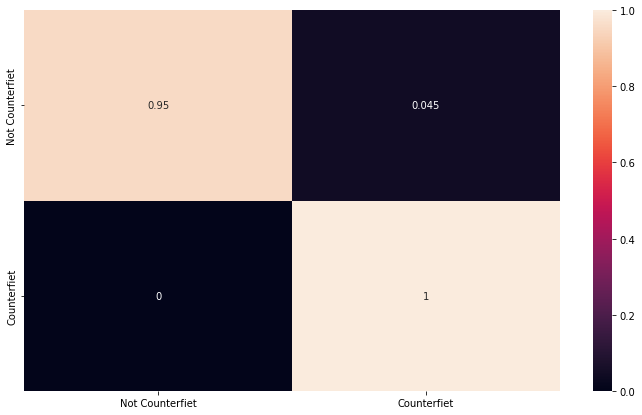

In [ ]:
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

# Simple Classifier

In [ ]:
pcaX = pca_x.to('cpu')
pcaX = pcaX.numpy()
pcaX

In [ ]:
yOut = PyY.to('cpu')
yOut = yOut.numpy()
yOut

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcaX,yOut,test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred,y_test

(array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[20,  1],
       [ 0, 19]])

<Axes: >

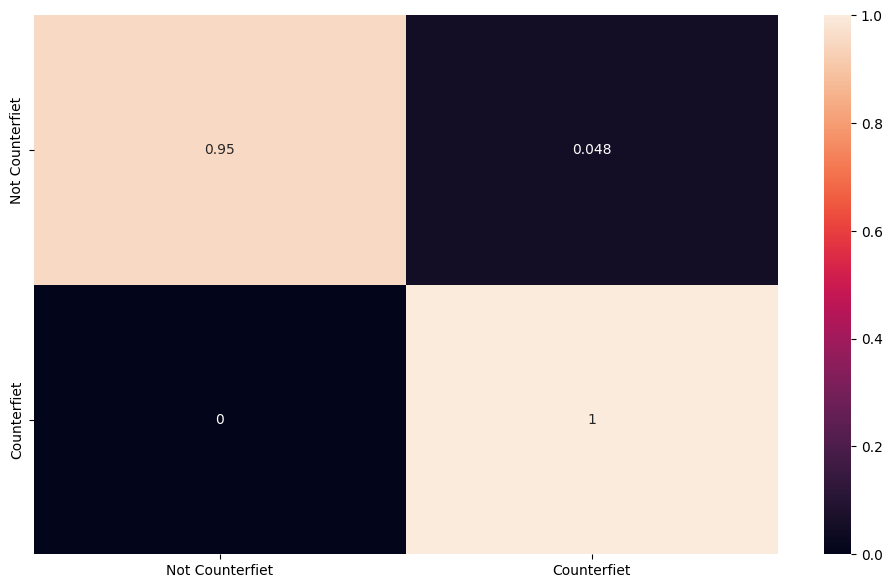

In [ ]:
classes = ['Not Counterfiet','Counterfiet']
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)